In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#building the model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#model Validatoin
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [2]:
df = pd.read_csv('training_v2.csv')

In [3]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


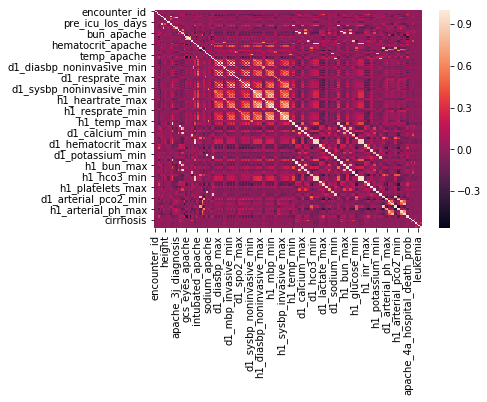

In [4]:
df1 = df.corr()
hm = sns.heatmap(df1)
hm

In [5]:
death_df = df['hospital_death']

In [6]:
df2 = df.corrwith(death_df, axis= 0)


In [7]:
df3 = pd.DataFrame(df2)


In [8]:
df3.columns = ['CorrValue']
df3['Corr'] = np.where(df2 < -.22, 'Yes', 'No')

In [9]:
neg_corr = df3[df3['Corr']=='Yes']

In [10]:
neg_corr

,CorrValue,Corr
gcs_eyes_apache,-0.260373,Yes
gcs_motor_apache,-0.282449,Yes
gcs_verbal_apache,-0.241044,Yes
d1_mbp_invasive_min,-0.222350,Yes
d1_sysbp_invasive_min,-0.234382,Yes
h1_albumin_max,-0.224928,Yes
h1_albumin_min,-0.225402,Yes
d1_arterial_ph_min,-0.230365,Yes


In [11]:
df4 = pd.DataFrame(df2)
df4.columns = ['CorrValue']
df4['Corr'] = np.where(df2 > .22, 'Yes', 'No')

In [12]:
pos_corr = df4[df4['Corr']=='Yes']
pos_corr

,CorrValue,Corr
hospital_death,1.000000,Yes
ventilated_apache,0.228661,Yes
d1_lactate_max,0.399029,Yes
d1_lactate_min,0.403614,Yes
h1_lactate_max,0.340951,Yes
h1_lactate_min,0.344046,Yes
apache_4a_hospital_death_prob,0.311043,Yes
apache_4a_icu_death_prob,0.283913,Yes


In [13]:
pos_corr.drop(['hospital_death','apache_4a_hospital_death_prob','apache_4a_icu_death_prob'], axis=0, inplace=True)

C:\Users\amber.toro\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [14]:
high_corr = pd.concat([pos_corr,neg_corr])

In [15]:
high_corr

,CorrValue,Corr
ventilated_apache,0.228661,Yes
d1_lactate_max,0.399029,Yes
d1_lactate_min,0.403614,Yes
h1_lactate_max,0.340951,Yes
h1_lactate_min,0.344046,Yes
gcs_eyes_apache,-0.260373,Yes
gcs_motor_apache,-0.282449,Yes
gcs_verbal_apache,-0.241044,Yes
d1_mbp_invasive_min,-0.222350,Yes
d1_sysbp_invasive_min,-0.234382,Yes


In [16]:
high_df = df[['encounter_id', 'patient_id', 'hospital_id','hospital_death','ventilated_apache','d1_lactate_max','d1_lactate_min','h1_lactate_max','h1_lactate_min', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 'd1_mbp_invasive_min', 'd1_sysbp_invasive_min',  'h1_albumin_max', 'h1_albumin_min', 'd1_arterial_ph_min']].copy()

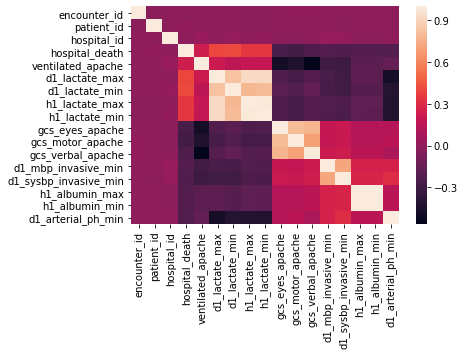

In [17]:
high_corr_corr = high_df.corr()
hmhc = sns.heatmap(high_corr_corr)

In [18]:
# dropped rows ventilated_apache 715 corr .22
# fill with mean d1_lactate_max 68396 corr .399
# fill with mean d1_lactate_min 68396 corr .4
# dropped columns h1_lactate_max 84369 & h1_lactate_min .34
# drop rows gcs_eyes_apache 1901 -.26
# drop rows gcs_motor_apache 1901 -.28
# drop rows gcs_verbal_apache 1901 -.24
# dropped columns d1_mbp_invasive_min 67777 -.22
# dropped columns d1_sysbp_invasive_min 67959 -.22 
# dropped column h1_albumin_max 83824 -.22
# dropped column h1_albumin_min 83824 -.22
# # dropped d1_arterial_ph_min 60123 -.23


# high_df['d1_arterial_ph_min'].isnull().sum()

In [19]:
high_df.drop(['h1_albumin_max', 'h1_albumin_min','h1_lactate_max', 'h1_lactate_min','d1_mbp_invasive_min', 'd1_sysbp_invasive_min', 'd1_arterial_ph_min'], axis = 1, inplace= True)
values = {'d1_lactate_max': high_df['d1_lactate_max'].mean(), 'd1_lactate_min': high_df['d1_lactate_min'].mean() }
high_df.fillna(value=values, inplace=True)
high_df.dropna(inplace=True)

In [20]:
high_df.isna().sum()

encounter_id         0
patient_id           0
hospital_id          0
hospital_death       0
ventilated_apache    0
d1_lactate_max       0
d1_lactate_min       0
gcs_eyes_apache      0
gcs_motor_apache     0
gcs_verbal_apache    0
dtype: int64

In [104]:
high_df

,encounter_id,patient_id,hospital_id,hospital_death,ventilated_apache,d1_lactate_max,d1_lactate_min,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache
0,66154,25312,118,0,0.0,1.300000,1.000000,3.0,6.0,4.0
1,114252,59342,81,0,1.0,3.500000,3.500000,1.0,3.0,1.0
2,119783,50777,118,0,0.0,2.927383,2.125128,3.0,6.0,5.0
3,79267,46918,118,0,1.0,2.927383,2.125128,4.0,6.0,5.0
5,33181,74489,83,0,0.0,2.927383,2.125128,4.0,6.0,5.0
6,82208,49526,83,0,1.0,2.927383,2.125128,4.0,6.0,5.0
7,120995,50129,33,0,1.0,2.927383,2.125128,4.0,6.0,5.0
8,80471,10577,118,1,1.0,5.900000,5.900000,4.0,6.0,5.0
9,42871,90749,118,0,0.0,2.927383,2.125128,4.0,6.0,5.0
10,105427,125898,77,0,0.0,2.927383,2.125128,4.0,6.0,5.0


In [21]:
# Splitting the dataset into the Training set and Test set
X = high_df.iloc[:,4:].values
y = high_df.iloc[:,3].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))

In [105]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor.fit(X_train, y_train)

C:\Users\amber.toro\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [106]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [107]:
y_pred

array([-0.22810783,  0.06377032, -0.22810783, ..., -0.09519557,
       -0.16778063, -0.23041121])

In [108]:
y_pred_b = np.where(y_pred<.5, 0, 1)

[[15345  1060]
 [  975   583]]
0.8867115737905695
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     16405
           1       0.35      0.37      0.36      1558

    accuracy                           0.89     17963
   macro avg       0.65      0.65      0.65     17963
weighted avg       0.89      0.89      0.89     17963



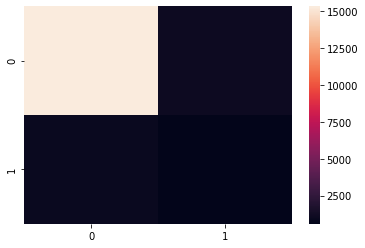

In [109]:
hm2 = confusion_matrix(y_test, y_pred_b)
sns.heatmap(hm2)
print(hm2)
print(accuracy_score(y_test, y_pred_b))
print(classification_report(y_test, y_pred_b))

In [93]:
subdf = pd.read_csv('unlabeled.csv')

In [94]:
subdf.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,2,127112,7,NaN,56.0,21.102439,0,Caucasian,M,180.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
1,5,130737,178,NaN,NaN,19.500595,1,Caucasian,F,145.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
2,7,101458,86,NaN,66.0,32.518596,1,African American,M,170.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
3,8,48067,163,NaN,64.0,20.798520,0,Caucasian,M,182.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory
4,10,25865,59,NaN,56.0,NaN,0,Caucasian,M,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic


In [95]:
subdf= subdf[['encounter_id', 'patient_id', 'hospital_id','hospital_death','ventilated_apache','d1_lactate_max','d1_lactate_min','h1_lactate_max','h1_lactate_min', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 'd1_mbp_invasive_min', 'd1_sysbp_invasive_min',  'h1_albumin_max', 'h1_albumin_min', 'd1_arterial_ph_min']]
subdf.drop(['h1_albumin_max', 'h1_albumin_min','h1_lactate_max', 'h1_lactate_min','d1_mbp_invasive_min', 'd1_sysbp_invasive_min', 'd1_arterial_ph_min'], axis = 1, inplace= True)
values = {'d1_lactate_max': subdf['d1_lactate_max'].mean(), 'd1_lactate_min': subdf['d1_lactate_min'].mean(),
         'ventilated_apache': subdf['ventilated_apache'].mean(),'gcs_eyes_apache': subdf['gcs_eyes_apache'].mean(),
         'gcs_motor_apache': subdf['gcs_motor_apache'].mean(),'gcs_verbal_apache': subdf['gcs_verbal_apache'].mean(),}
subdf.fillna(value=values, inplace=True)


In [96]:
subdf.isna().sum()

encounter_id             0
patient_id               0
hospital_id              0
hospital_death       39308
ventilated_apache        0
d1_lactate_max           0
d1_lactate_min           0
gcs_eyes_apache          0
gcs_motor_apache         0
gcs_verbal_apache        0
dtype: int64

In [97]:
X = subdf.iloc[:,4:].values
y = subdf.iloc[:,3].values

In [98]:
y_pred2 = regressor.predict(X)

In [99]:
y_pred2

array([1.28273171e-01, 3.09643077e-02, 1.28273171e-01, ...,
       6.80000000e-02, 9.28775259e-08, 9.28775259e-08])

In [100]:
subdf['hospital_death'] = y_pred2

In [101]:
subdf.head()

,encounter_id,patient_id,hospital_id,hospital_death,ventilated_apache,d1_lactate_max,d1_lactate_min,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache
0,2,127112,7,0.128273,0.0,2.919352,1.987876,2.0,5.0,1.0
1,5,130737,178,0.030964,0.0,2.919352,1.987876,4.0,6.0,4.0
2,7,101458,86,0.128273,0.0,2.919352,1.987876,2.0,5.0,1.0
3,8,48067,163,0.000000,1.0,0.800000,0.800000,4.0,6.0,1.0
4,10,25865,59,0.335293,1.0,2.919352,1.987876,1.0,4.0,1.0


In [102]:
sub = subdf[['encounter_id','hospital_death']]

In [103]:
sub.to_csv('submission.csv', index=False)